In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


df_siec = pd.read_csv("df_siec.csv")

In [ ]:
agregados = ["EU27_2020", "EU28", "EA19", "EA20", "EA", "EFTA", "EU15", "EU25", "EU27"]

df_siec = df_siec[~df_siec["geo"].isin(agregados)].copy()

df_siec_log = df_siec.copy()

exclude_cols = ["geo", "TIME_PERIOD", "PIB_growth_pct"]
siec_cols = [c for c in df_siec.columns if c not in exclude_cols]

df_siec_log[siec_cols] = df_siec_log[siec_cols].clip(lower=0)
df_siec_log[siec_cols] = np.log1p(df_siec_log[siec_cols])

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df_siec_log[siec_cols].fillna(0))

In [4]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()
X_pca = pca.fit_transform(X)


explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

import pandas as pd
pca_results = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained_var))],
    "ExplainedVar": explained_var,
    "CumulativeVar": cum_var
})

print(pca_results.head(15))  


      PC  ExplainedVar  CumulativeVar
0    PC1      0.296279       0.296279
1    PC2      0.119770       0.416049
2    PC3      0.066450       0.482499
3    PC4      0.060157       0.542656
4    PC5      0.044167       0.586824
5    PC6      0.040464       0.627288
6    PC7      0.036842       0.664130
7    PC8      0.033567       0.697697
8    PC9      0.030140       0.727837
9   PC10      0.020329       0.748166
10  PC11      0.018575       0.766741
11  PC12      0.017351       0.784092
12  PC13      0.015012       0.799104
13  PC14      0.013409       0.812513
14  PC15      0.012637       0.825150


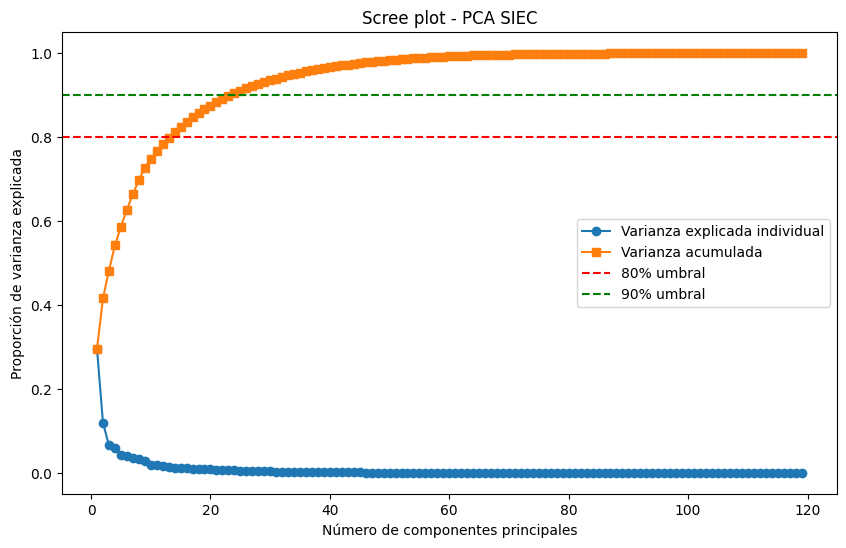

In [5]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_var)+1), explained_var, marker="o", label="Varianza explicada individual")
plt.plot(range(1, len(cum_var)+1), cum_var, marker="s", label="Varianza acumulada")
plt.axhline(0.80, color="red", linestyle="--", label="80% umbral")
plt.axhline(0.90, color="green", linestyle="--", label="90% umbral")
plt.xlabel("Número de componentes principales")
plt.ylabel("Proporción de varianza explicada")
plt.title("Scree plot - PCA SIEC")
plt.legend()
plt.show()


In [ ]:

pca_results = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained_var))],
    "ExplainedVar": explained_var,
    "CumulativeVar": cum_var
})

print(pca_results.head(21))  


      PC  ExplainedVar  CumulativeVar
0    PC1      0.296279       0.296279
1    PC2      0.119770       0.416049
2    PC3      0.066450       0.482499
3    PC4      0.060157       0.542656
4    PC5      0.044167       0.586824
5    PC6      0.040464       0.627288
6    PC7      0.036842       0.664130
7    PC8      0.033567       0.697697
8    PC9      0.030140       0.727837
9   PC10      0.020329       0.748166
10  PC11      0.018575       0.766741
11  PC12      0.017351       0.784092
12  PC13      0.015012       0.799104
13  PC14      0.013409       0.812513
14  PC15      0.012637       0.825150
15  PC16      0.011255       0.836406
16  PC17      0.010559       0.846965
17  PC18      0.010044       0.857009
18  PC19      0.009336       0.866345
19  PC20      0.008939       0.875284
20  PC21      0.008088       0.883373


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=siec_cols,
    columns=[f"PC{i+1}" for i in range(len(siec_cols))]
)

num_components_show = 20

for i in range(num_components_show):
    pc = f"PC{i+1}"
    print(f"\n=== {pc} (Explains {pca.explained_variance_ratio_[i]*100:.2f}% of variance) ===")
    print("Top 10 positive loadings:")
    print(loadings[pc].sort_values(ascending=False).head(10))
    print("\nTop 10 negative loadings:")
    print(loadings[pc].sort_values(ascending=True).head(10))


=== PC1 (Explica 29.63% de varianza) ===
Top 10 variables positivas:
GEP_Bioenergía           0.144065
DL_Bioenergía            0.143896
DL_total                 0.136988
FC_IND_E_Bioenergía      0.136450
FC_E_Nuclear             0.136238
AFC_Nuclear              0.135925
FC_TRA_E_Bioenergía      0.135244
FC_E_Bioenergía          0.134186
GHP_MAPCHP_Bioenergía    0.134161
AFC_Bioenergía           0.134125
Name: PC1, dtype: float64

Top 10 variables negativas:
FC_E_Renovables_total         -0.018662
FC_IND_E_Renovables_total     -0.018662
GEP_MAPCHP_Renovables_total   -0.017120
GHP_Renovables_total          -0.016665
GHP_MAPCHP_Renovables_total   -0.016645
AFC_Renovables_total          -0.016196
GEP_Renovables_total          -0.015960
GEP_MAPE_Renovables_total     -0.011058
FC_TRA_E_Eólica                0.000000
FC_TRA_E_Hidráulica            0.000000
Name: PC1, dtype: float64

=== PC2 (Explica 11.98% de varianza) ===
Top 10 variables positivas:
TRANS_CAR                0.135737
TRANS

| Componente | Varianza explicada | Variables dominantes (+)                                      | Variables dominantes (–)                                         | Interpretación                                                                       |
| ---------- | ------------------ | ------------------------------------------------------------- | ---------------------------------------------------------------- | ------------------------------------------------------------------------------------ |
| **PC1**    | 35.3%              | Bioenergía, Nuclear, Consumo total                            | Transporte renovable, consumo eléctrico anual                    | **Escala total del sistema energético (bioenergía + nuclear vs. sistemas pequeños)** |
| **PC2**    | 11.2%              | Gas (todas las formas), petróleo y carbón en sectores         | Transporte (car, bus, tren, avión, mar), nuclear en cogeneración | **Gas-dependencia vs. transporte/nuclear**                                           |
| **PC3**    | 7.8%               | Renovables totales (eléctrico, calor, cogeneración)           | Nuclear, carbón, petróleo                                        | **Renovables vs. fósiles/nuclear**                                                   |
| **PC4**    | 5.0%               | Renovables en industria y electricidad                        | Gas y transporte                                                 | **Renovables sector industrial vs. gas/transporte**                                  |
| **PC5**    | 3.9%               | Transporte total, eficiencia energética, nuclear              | Solar y eólica                                                   | **Transporte + nuclear vs. renovables no convencionales**                            |
| **PC6**    | 3.6%               | Solar y eólica (todas las formas)                             | Emisiones (GHG, CO₂, CH₄, N₂O)                                   | **Renovables no convencionales vs. emisiones**                                       |
| **PC7**    | 3.4%               | Producción renovable (solar, eólica, hidráulica, bioenergía)  | Petróleo y calor nuclear                                         | **Producción renovable vs. petróleo/nuclear**                                        |
| **PC8**    | 3.1%               | Emisiones (CH₄, CO₂, N₂O, GHG)                                | Renovables en cogeneración (solar/eólica/hidráulica)             | **Emisiones totales vs. cogeneración renovable**                                     |
| **PC9**    | 2.4%               | Carbón (producción y consumo), PIB real                       | Hidráulica (consumo, producción)                                 | **Carbón + tamaño económico vs. hidráulica**                                         |
| **PC10**   | 1.8%               | Nuclear y petróleo (pérdidas, calor)                          | Gas, petróleo y PIB real (negativos)                             | **Nuclear/petróleo en pérdidas vs. gas y PIB**                                       |
| **PC11**   | 1.8%               | Pérdidas en solar/eólica, PIB, emisiones                      | Transporte fósil (petróleo, carbón) y algo de hidráulica         | **Pérdidas renovables + PIB vs. transporte fósil**                                   |
| **PC12**   | 1.5%               | Consumo eléctrico anual, pérdidas fósiles, PIB                | Pérdidas renovables y transporte                                 | **Demanda eléctrica + pérdidas fósiles vs. renovables y transporte**                 |
| **PC13**   | 1.4%               | Transporte fósil (petróleo, gas, carbón) y total              | Hidráulica y nuclear                                             | **Transporte fósil vs. hidráulica/nuclear**                                          |
| **PC14**   | 1.2%               | Carbón, nuclear, transporte nuclear/bio                       | Bioenergía, hidráulica, renovables                               | **Carbón + nuclear/transporte vs. bio/hidráulica**                                   |
| **PC15**   | 1.2%               | Pérdidas fósiles, bioenergía, PIB                             | Nuclear, carbón, transporte                                      | **Pérdidas fósiles + bioenergía/PIB vs. nuclear/fósiles**                            |
| **PC16**   | 1.0%               | Transporte marítimo, pérdidas fósiles, petróleo, electricidad | Transporte carbón, bioenergía, gas                               | **Transporte marítimo + fósiles vs. bio/gas**                                        |
| **PC17**   | 1.0%               | Electricidad anual, solar/eólica, transporte fósil            | Hidráulica y carbón                                              | **Electricidad + renovables vs. hidráulica/carbón**                                  |
| **PC18**   | 0.9%               | Hidráulica (producción, cogeneración), solar                  | Hidráulica en consumo, carbón                                    | **Producción hidráulica/solar vs. consumo fósil**                                    |
| **PC19**   | 0.8%               | Hidráulica (pérdidas, cogeneración), carbón, transporte tren  | Transporte carbón, renovables, petróleo                          | **Hidráulica y tren vs. carbón/petróleo**                                            |
| **PC20**   | 0.8%               | PIB real, transporte fósil (carbón, gas, petróleo)            | Pérdidas (todas), nuclear                                        | **PIB + transporte fósil vs. pérdidas/nuclear**                                      |


C:\Users\joelm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joelm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joelm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

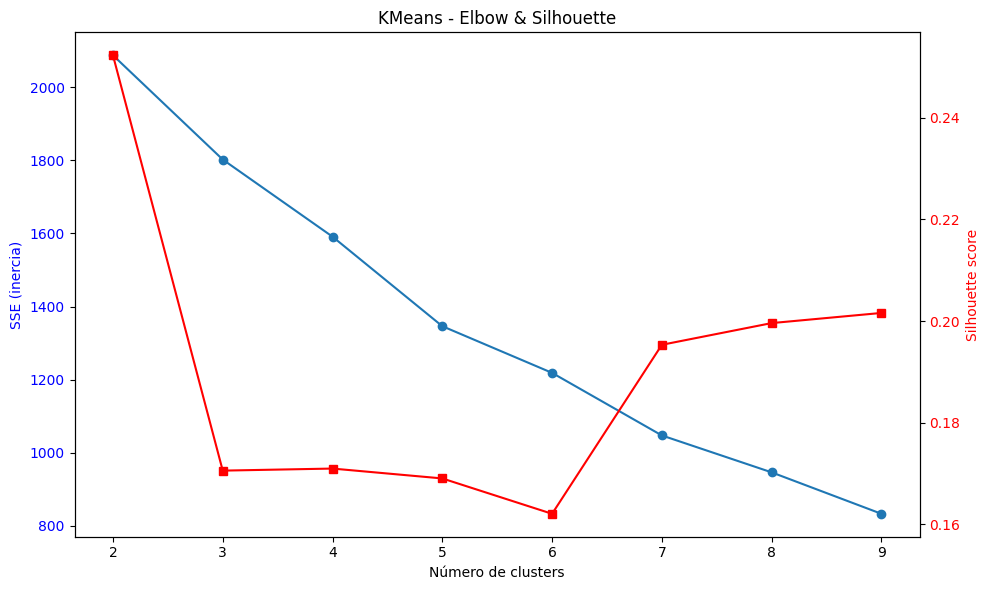

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_pca = pca.fit_transform(X)  
df_pca_scores = pd.DataFrame(
    X_pca, 
    columns=[f"PC{i+1}" for i in range(X_pca.shape[1])]
)

df_pca_scores[["geo","TIME_PERIOD"]] = df_siec_log[["geo","TIME_PERIOD"]].iloc[:len(X_pca)].reset_index(drop=True)

df_pca_country = df_pca_scores.groupby("geo").mean().reset_index()

n_pcs = min(20, X_pca.shape[1])  
X_cluster = df_pca_country[[f"PC{i+1}" for i in range(n_pcs)]]

sse = []
sil_scores = []
K = range(2,10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_cluster)
    sse.append(km.inertia_)
    sil_scores.append(silhouette_score(X_cluster, labels))

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(K, sse, marker="o", label="SSE (elbow)")
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("SSE (inertia)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(K, sil_scores, marker="s", color="red", label="Silhouette")
ax2.set_ylabel("Silhouette score", color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.title("KMeans - Elbow & Silhouette Analysis")
fig.tight_layout()
plt.show()

C:\Users\joelm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


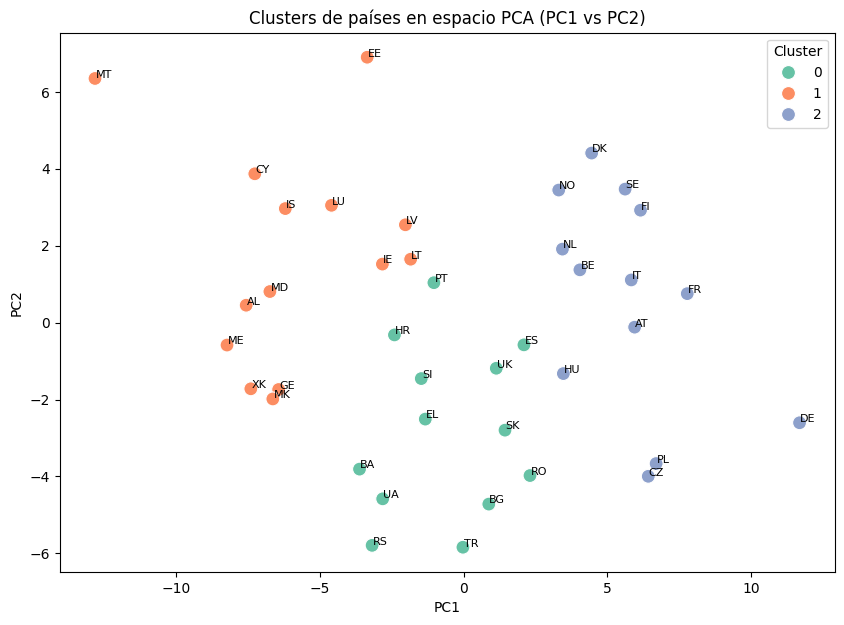

In [ ]:
from sklearn.cluster import KMeans

k_opt = 3
km = KMeans(n_clusters=k_opt, random_state=42)
df_pca_country["Cluster"] = km.fit_predict(X_cluster)

plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df_pca_country, 
    x="PC1", y="PC2", 
    hue="Cluster", 
    palette="Set2", 
    s=100
)

for i, row in df_pca_country.iterrows():
    plt.text(row["PC1"]+0.02, row["PC2"]+0.02, row["geo"], fontsize=8)

plt.title("Country clusters in PCA space (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

df_clustersk3 = df_pca_country[["geo","Cluster"]].sort_values("Cluster")

C:\Users\joelm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


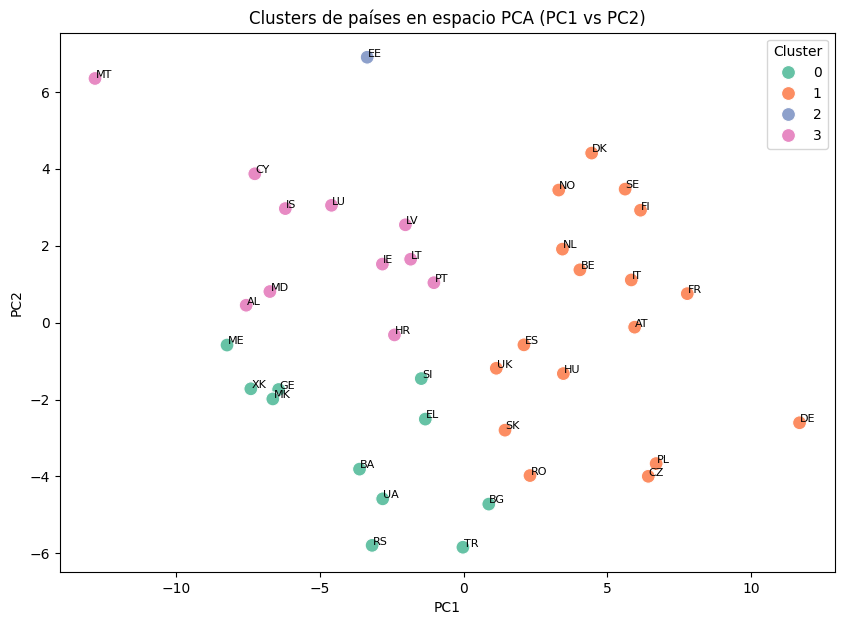

In [ ]:
from sklearn.cluster import KMeans

k_opt = 4
km = KMeans(n_clusters=k_opt, random_state=42)
df_pca_country["Cluster"] = km.fit_predict(X_cluster)

plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df_pca_country, 
    x="PC1", y="PC2", 
    hue="Cluster", 
    palette="Set2", 
    s=100
)

for i, row in df_pca_country.iterrows():
    plt.text(row["PC1"]+0.02, row["PC2"]+0.02, row["geo"], fontsize=8)

plt.title("Country clusters in PCA space (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

df_clustersk4 = df_pca_country[["geo","Cluster"]].sort_values("Cluster")

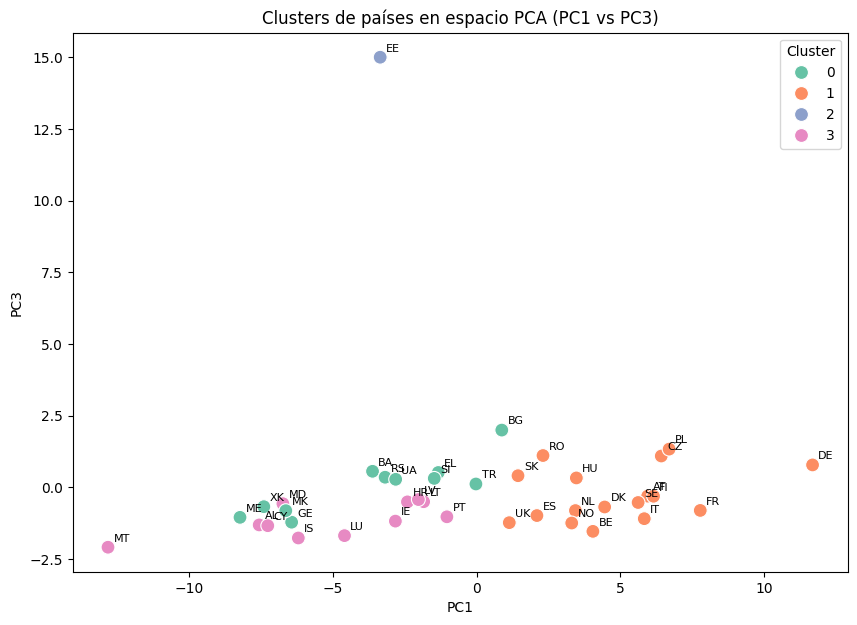

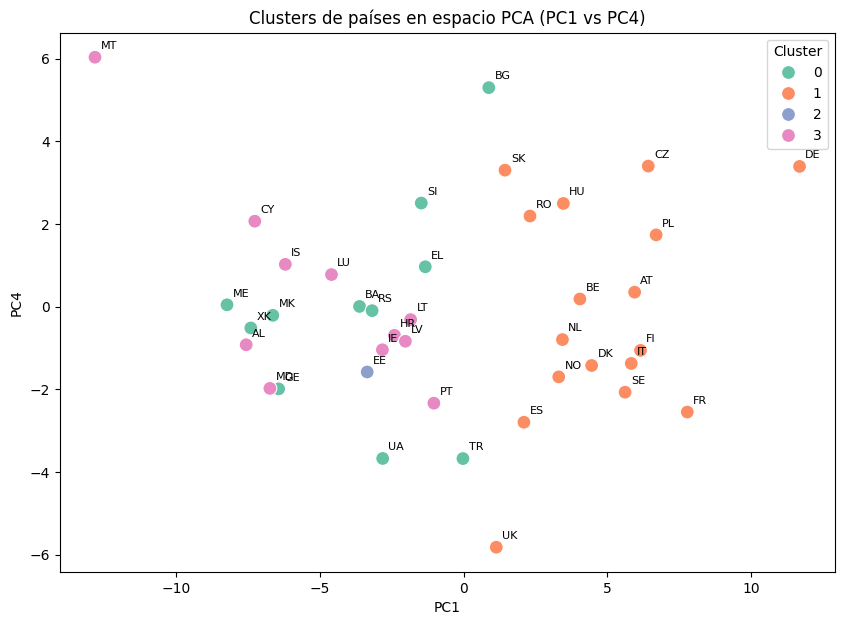

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df_pca_country, 
    x="PC1", y="PC3", 
    hue="Cluster", 
    palette="Set2", 
    s=100
)

for i, row in df_pca_country.iterrows():
    plt.text(row["PC1"]+0.2, row["PC3"]+0.2, row["geo"], fontsize=8)

plt.title("Country clusters in PCA space (PC1 vs PC3)")
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.legend(title="Cluster")
plt.show()


plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df_pca_country, 
    x="PC1", y="PC4", 
    hue="Cluster", 
    palette="Set2", 
    s=100
)

for i, row in df_pca_country.iterrows():
    plt.text(row["PC1"]+0.2, row["PC4"]+0.2, row["geo"], fontsize=8)

plt.title("Country clusters in PCA space (PC1 vs PC4)")
plt.xlabel("PC1")
plt.ylabel("PC4")
plt.legend(title="Cluster")
plt.show()

In [12]:
df_pca_scores[df_pca_scores["geo"]=="EE"][["PC1","PC2","PC3","PC4"]].head()

,PC1,PC2,PC3,PC4
282,-7.464555,4.290215,17.720357,-2.041854
283,-7.540781,4.351140,17.707589,-2.068206
284,-6.881523,4.448780,14.913014,-1.527373
285,-7.234172,5.003938,16.061639,-1.438590
286,-6.859817,5.354245,16.547806,-1.673814


Estonia aparece como un outlier energético porque su mix se aparta del patrón europeo: tiene muy poca presencia de nuclear y bioenergía, una dependencia notable del gas, y sobre todo un perfil atípico en renovables/fósiles debido a su fuerte uso histórico de oil shale. Esto la coloca en valores extremos en PC3, separándola claramente del resto de países.

In [13]:
X = df_pca_country[[f"PC{i+1}" for i in range(20)]]


In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

df_country_mean = (
    df_siec_log.groupby("geo")[["EMI_GHG", "EFF_PEC_EED", "PIB_real_MEUR"]]
    .mean()
    .reset_index()
)

df_reg = df_pca_country.merge(df_country_mean, on="geo", how="inner")

X = df_reg[[f"PC{i+1}" for i in range(20)]]
y = df_reg["EMI_GHG"]

mask = y.notna()
X = X[mask]
y = y[mask]

model = LinearRegression()
model.fit(X, y)

print("R² of the model:", model.score(X, y))

coefs = pd.Series(model.coef_, index=X.columns)
print("\nTop 10 PCs with highest positive influence:")
print(coefs.sort_values(ascending=False).head(10))
print("\nTop 10 PCs with highest negative influence:")
print(coefs.sort_values().head(10))

R² del modelo: 0.9868773198321918

Top 10 PCs con mayor influencia positiva:
PC6     0.433935
PC1     0.313915
PC4     0.286418
PC15    0.271964
PC11    0.253352
PC18    0.217196
PC16    0.160494
PC7     0.135188
PC12    0.121397
PC2     0.108559
dtype: float64

Top 10 PCs con mayor influencia negativa:
PC8    -0.804213
PC10   -0.277634
PC13   -0.255042
PC9    -0.113523
PC17   -0.106081
PC14   -0.009101
PC5     0.012586
PC20    0.084337
PC19    0.101531
PC3     0.105205
dtype: float64


| Componente | Varianza explicada | Variables dominantes (+)                         | Variables dominantes (–)                         | Interpretación                                                                   | Influencia sobre emisiones                                                                                                      |
| ---------- | ------------------ | ------------------------------------------------ | ------------------------------------------------ | -------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------- |
| **PC1**    | 35.3 %             | Bioenergía, Nuclear, Consumo total               | Transporte renovable, Consumo eléctrico anual    | Escala total del sistema energético (bioenergía + nuclear vs. sistemas pequeños) | **Positiva (0.31)** — países con gran escala energética tienden a emitir más                                                    |
| **PC2**    | 11.2 %             | Gas, Petróleo y Carbón (sectores varios)         | Transporte (car, bus, tren, avión, mar)          | Dependencia del gas/fósiles vs. transporte                                       | **Leve positiva (0.11)** — más gas implica más emisiones                                                                        |
| **PC3**    | 7.8 %              | Renovables totales (eléctrico, calor)            | Nuclear, Carbón, Petróleo                        | Renovables vs. fósiles/nuclear                                                   | **Neutra** (coef ~ 0.10)                                                                                                        |
| **PC4**    | 5.0 %              | Renovables industriales/elétricas                | Gas y transporte                                 | Renovables industriales vs. fósiles/transporte                                   | **Positiva (0.29)** — probablemente porque refleja industrias intensivas aún con fósiles                                        |
| **PC5**    | 3.9 %              | Transporte total, Eficiencia, Nuclear            | Solar y Eólica                                   | Transporte + nuclear vs. renovables no convencionales                            | **Casi nula (0.01)**                                                                                                            |
| **PC6**    | 3.6 %              | Solar y Eólica (todas las formas)                | Emisiones GHG/CO₂/CH₄                            | Renovables no convencionales vs. emisiones                                       | **Muy positiva (0.43)** — paradoja aparente: países con alta capacidad renovable también concentran grandes emisores históricos |
| **PC7**    | 3.4 %              | Producción renovable (solar, eólica, hidráulica) | Petróleo, calor nuclear                          | Producción renovable vs. fósiles                                                 | **Positiva (0.14)**                                                                                                             |
| **PC8**    | 3.1 %              | Emisiones (CH₄, CO₂, N₂O, GHG)                   | Cogeneración renovable (solar/eólica/hidráulica) | Emisiones totales vs. cogeneración renovable                                     | **Negativa fuerte (–0.80)** — representa el “factor emisiones puras” inversamente ligado a cogeneración limpia                  |
| **PC9**    | 2.4 %              | Carbón, PIB                                      | Hidráulica                                       | Carbón + tamaño económico vs. hidráulica                                         | **Negativa moderada (–0.11)**                                                                                                   |
| **PC10**   | 1.8 %              | Nuclear/Petróleo en pérdidas                     | Gas y PIB real                                   | Nuclear/petróleo en pérdidas vs. gas/PIB                                         | **Negativa (–0.28)**                                                                                                            |
| **PC11**   | 1.8 %              | Pérdidas renovables, PIB, emisiones              | Transporte fósil, hidráulica                     | Pérdidas renovables + PIB vs. transporte fósil                                   | **Positiva (0.25)**                                                                                                             |
| **PC12**   | 1.5 %              | Electricidad anual, pérdidas fósiles, PIB        | Renovables, transporte                           | Demanda eléctrica + pérdidas fósiles vs. renovables                              | **Positiva (0.12)**                                                                                                             |
| **PC13**   | 1.4 %              | Transporte fósil                                 | Hidráulica, Nuclear                              | Transporte fósil vs. hidráulica/nuclear                                          | **Negativa (–0.26)**                                                                                                            |
| **PC14**   | 1.2 %              | Carbón, Nuclear                                  | Bioenergía, Hidráulica                           | Carbón + nuclear/transporte vs. bio/hidráulica                                   | **Casi nula (–0.01)**                                                                                                           |
| **PC15**   | 1.2 %              | Pérdidas fósiles, Bioenergía, PIB                | Nuclear, Carbón, Transporte                      | Pérdidas fósiles + bioenergía + PIB vs. nuclear/fósiles                          | **Positiva (0.27)**                                                                                                             |
| **PC16**   | 1.0 %              | Transporte marítimo, Pérdidas fósiles, Petróleo  | Bioenergía, Gas                                  | Transporte marítimo + fósiles vs. bio/gas                                        | **Positiva (0.16)**                                                                                                             |
| **PC17**   | 1.0 %              | Electricidad, Solar/Eólica, Transporte fósil     | Hidráulica, Carbón                               | Electricidad + renovables vs. hidráulica/carbón                                  | **Negativa leve (–0.11)**                                                                                                       |
| **PC18**   | 0.9 %              | Hidráulica/solar (producción)                    | Consumo fósil                                    | Producción hidráulica/solar vs. consumo fósil                                    | **Positiva (0.22)**                                                                                                             |
| **PC19**   | 0.8 %              | Hidráulica, Carbón, Tren                         | Renovables, Petróleo                             | Hidráulica + transporte tren vs. fósiles                                         | **Positiva leve (0.10)**                                                                                                        |
| **PC20**   | 0.8 %              | PIB real, Transporte fósil                       | Pérdidas, Nuclear                                | PIB + transporte fósil vs. pérdidas/nuclear                                      | **Leve positiva (0.08)**                                                                                                        |


## Por tema

| Grupo                       | PCs                                        | Concepto principal                                                    |
| --------------------------- | ------------------------------------------ | --------------------------------------------------------------------- |
| **Energía total y fósiles** | PC1, PC2, PC4, PC9, PC10, PC14, PC15, PC16 | Escala del sistema, gas/petróleo/carbón, pérdidas fósiles             |
| **Renovables y eficiencia** | PC3, PC5, PC6, PC7, PC11, PC12, PC18       | Solar, eólica, hidráulica, bioenergía, eficiencia energética          |
| **Transporte**              | PC13, PC17, PC19, PC20                     | Modos de transporte (car, tren, mar, aéreo) y su relación con energía |
| **Emisiones y transición**  | PC8 (y parcialmente PC6)                   | Emisiones GHG, cogeneración limpia, transición energética             |


In [ ]:
grupos = {
    "Energia_fosil": ["PC1", "PC2", "PC4", "PC9", "PC10", "PC14", "PC15", "PC16"],
    "Renovables_eficiencia": ["PC3", "PC5", "PC6", "PC7", "PC11", "PC12", "PC18"],
    "Transporte": ["PC13", "PC17", "PC19", "PC20"],
    "Emisiones_transicion": ["PC8"]
}

for tema, pcs in grupos.items():
    df_pca_country[tema] = df_pca_country[pcs].mean(axis=1)


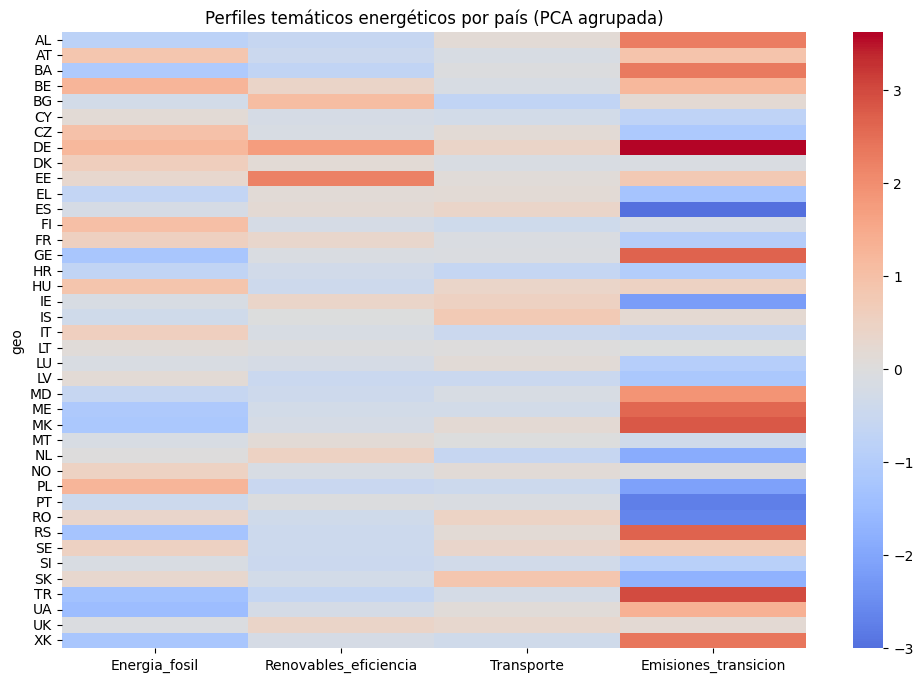

In [16]:
plt.figure(figsize=(12,8))
df_plot = df_pca_country.set_index("geo")[["Energia_fosil","Renovables_eficiencia","Transporte","Emisiones_transicion"]]
sns.heatmap(df_plot, cmap="coolwarm", center=0)
plt.title("Perfiles temáticos energéticos por país (PCA agrupada)")
plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
import folium
from folium import Choropleth, LayerControl

df_pca_grouped = df_pca_country[["geo"] + list(grupos.keys())].copy()

url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
gdf_europe = gpd.read_file(url)
gdf_europe = gdf_europe[gdf_europe["CONTINENT"] == "Europe"].copy()

iso_map = {
    "ALB": "AL", "AUT": "AT", "BEL": "BE", "BGR": "BG", "HRV": "HR", "CYP": "CY", "CZE": "CZ", 
    "DNK": "DK", "EST": "EE", "FIN": "FI", "FRA": "FR", "DEU": "DE", "GRC": "EL", "HUN": "HU",
    "ISL": "IS", "IRL": "IE", "ITA": "IT", "LVA": "LV", "LTU": "LT", "LUX": "LU", "MLT": "MT",
    "NLD": "NL", "NOR": "NO", "POL": "PL", "PRT": "PT", "ROU": "RO", "SVK": "SK", "SVN": "SI",
    "ESP": "ES", "SWE": "SE", "CHE": "CH", "GBR": "UK", "SRB": "RS", "MNE": "ME", "MKD": "MK",
    "BIH": "BA", "UKR": "UA", "MDA": "MD", "GEO": "GE", "TUR": "TR", "XKX": "XK"
}
gdf_europe["geo"] = gdf_europe["ISO_A3"].map(iso_map)
gdf_merge = gdf_europe.merge(df_pca_grouped, on="geo", how="left").fillna(0)
geojson_data = gdf_merge.to_json()

m = folium.Map(location=[54, 15], zoom_start=4, tiles="CartoDB positron")

themes = ["Energia_fosil", "Renovables_eficiencia", "Transporte", "Emisiones_transicion"]

for theme in themes:
    choropleth = Choropleth(
        geo_data=geojson_data,
        data=gdf_merge,
        columns=["geo", theme],
        key_on="feature.properties.geo",
        fill_color="RdYlBu_r",
        fill_opacity=0.8,
        line_opacity=0.3,
        legend_name=theme.replace("_", " ").title(),
        name=theme.replace("_", " ").title(),
        show=False
    )
    choropleth.add_to(m)

LayerControl(collapsed=False).add_to(m)

m.save("mapa_pca_temas.html")
m

C:\Users\joelm\AppData\Local\Temp\ipykernel_3388\2141062045.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gdf_merge = gdf_europe.merge(df_pca_grouped, on="geo", how="left").fillna(0)
